In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
import matplotlib.pyplot as plt

#### Data preparation:

In [2]:
max_features = 10000  # Dictionary size
maxlen = 500  # Number of words in the review
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Creation of models:

In [3]:
# A regular RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

# LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

# Two-sided BRNN
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32))
model_brnn.add(Bidirectional(SimpleRNN(32)))
model_brnn.add(Dense(1, activation='sigmoid'))

# Deep DRNN
model_drnn = Sequential()
model_drnn.add(Embedding(max_features, 32))
model_drnn.add(SimpleRNN(32, return_sequences=True))
model_drnn.add(SimpleRNN(32))
model_drnn.add(Dense(1, activation='sigmoid'))

models = [model_rnn, model_lstm, model_brnn, model_drnn]

#### Training models and obtaining accuracy parameters:

In [4]:
histories = []

for i, model in enumerate(models):
    print(f'Training model {i+1}...')
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(input_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2)
    histories.append(history)

Training model 1...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step - acc: 0.5532 - loss: 0.6790 - val_acc: 0.8008 - val_loss: 0.4669
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - acc: 0.7976 - loss: 0.4535 - val_acc: 0.8278 - val_loss: 0.4006
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - acc: 0.8682 - loss: 0.3210 - val_acc: 0.7806 - val_loss: 0.4703
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - acc: 0.8898 - loss: 0.2732 - val_acc: 0.7570 - val_loss: 0.5233
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - acc: 0.9141 - loss: 0.2273 - val_acc: 0.7824 - val_loss: 0.4727
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - acc: 0.9446 - loss: 0.1534 - val_acc: 0.8616 - val_loss: 0.3785
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - acc: 0.9690 - loss: 0.0959 - val_acc: 0.8466 - val_loss: 0.4220
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - acc: 0.9807 - loss: 0.0647 - val_acc: 0.7924 - val_loss: 0.5733
Epoch 9/10
1

#### Output of graphs:

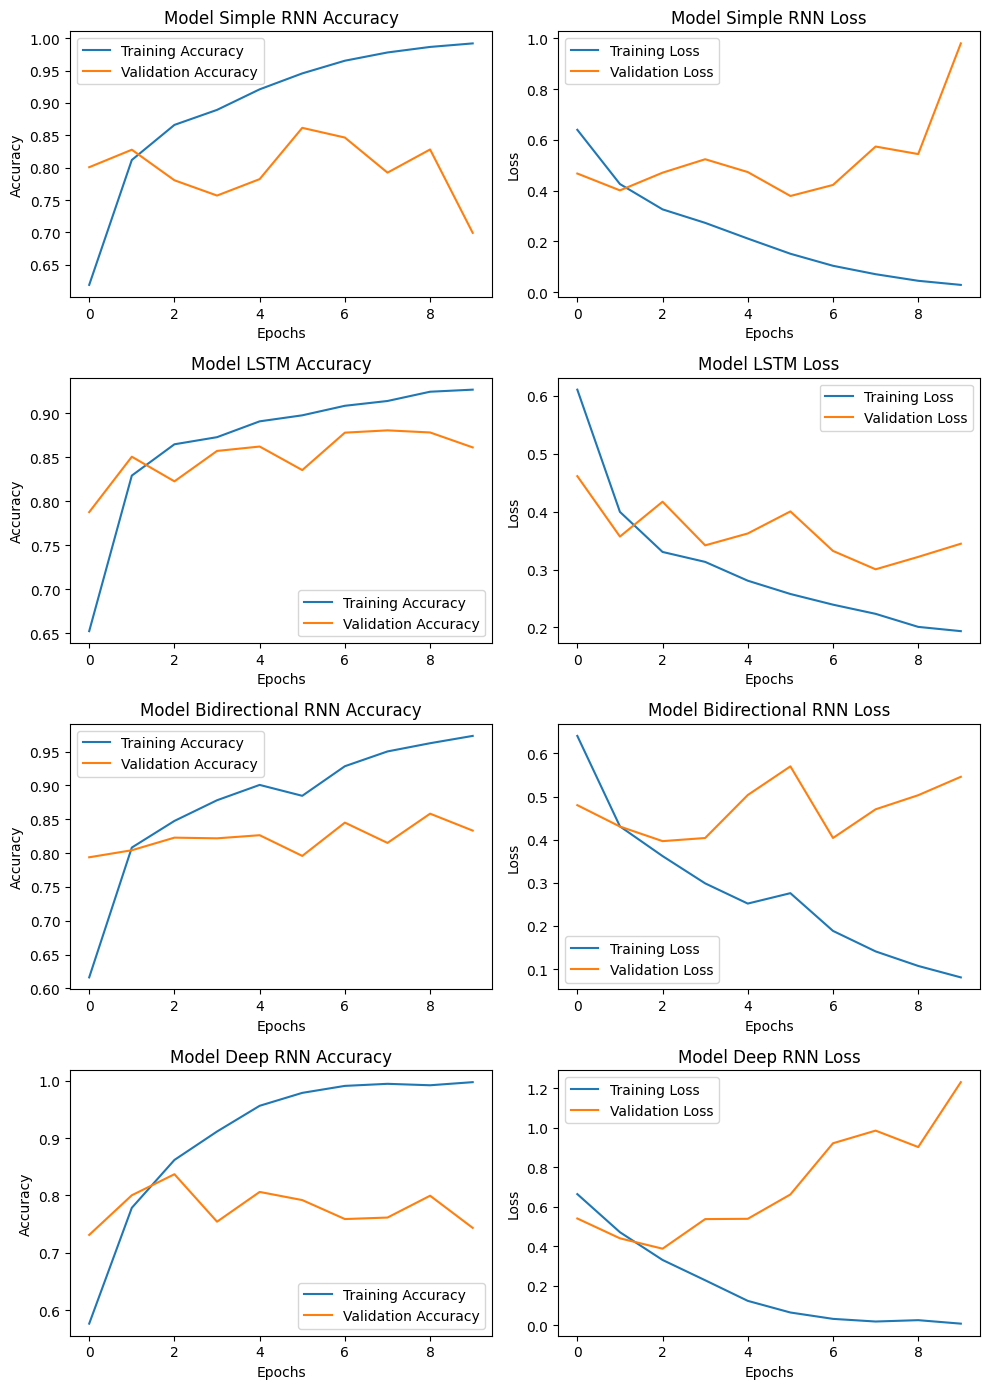

In [5]:
plt.figure(figsize=(10, 14))
model_names = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Deep RNN']

for i, history in enumerate(histories):
    plt.subplot(4, 2, 2*i+1)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.title(f'Model {model_names[i]} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_names[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Creating a list for options
model_names = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Deep RNN']
train_acc = []
val_acc = []
train_loss = []
val_loss = []

# Collecting results from stories
for history in histories:
    train_acc.append(history.history['acc'][-1])
    val_acc.append(history.history['val_acc'][-1])
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

# Creating a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc,
    'Train Loss': train_loss,
    'Validation Loss': val_loss
})

df.head()

,Model,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Simple RNN,0.99205,0.6994,0.028203,0.979647
1,LSTM,0.92690,0.8612,0.193635,0.344609
2,Bidirectional RNN,0.97310,0.8332,0.080540,0.545836
3,Deep RNN,0.99725,0.7436,0.007836,1.230870


## Висновки

### Simple RNN
- Дуже висока точність на тренувальному наборі (0.99205), але значно нижча на валідаційному наборі (0.6994). Це вказує на сильне перенавчання.
- Низька втрата на тренуванні (0.028203) та висока на валідації (0.979647), що також підтверджує перенавчання.

### LSTM
- Хороший баланс між тренувальною (0.92690) та валідаційною (0.8612) точністю.
- Відносно низька втрата на тренуванні (0.193635) та валідації (0.344609), що вказує на хороше узагальнення моделі.
- LSTM демонструє найкращу валідаційну точність серед усіх моделей, що робить її найефективнішою для даного завдання.

### Bidirectional RNN
- Висока точність на тренувальному наборі (0.97310) та гарна точність на валідаційному наборі (0.8332), але нижча, ніж у LSTM.
- Втрата на тренуванні (0.080540) нижча, ніж у LSTM, але втрата на валідації (0.545836) вища.
- Ця модель також страждає від перенавчання, хоча й меншою мірою, ніж Simple RNN.

### Deep RNN
- Найвища точність на тренувальному наборі (0.99725) і найнижча втрата (0.007836), але дуже низька валідаційна точність (0.7436) і найвища втрата на валідації (1.230870).
- Сильне перенавчання, навіть більш виражене, ніж у Simple RNN.

## Підсумок
- **LSTM** показує найкращі результати в контексті валідаційної точності та втрат, демонструючи хорошу здатність до узагальнення. Це робить її найкращою моделлю для класифікації рецензій в даному випадку.
- **Simple RNN** та **Deep RNN** моделі сильно перенавчені, що робить їх менш придатними для цієї задачі.
- **Bidirectional RNN** також демонструє хороші результати, але поступається LSTM у валідаційній точності.

Це завдання підкреслює важливість вибору правильної архітектури рекурентних нейронних мереж для досягнення оптимальних результатів. **LSTM** показали себе найкраще завдяки своїй здатності краще обробляти довготривалі залежності в текстових даних.
